# ÂØπÊØîÊÄßÊµãËØï

## ÂØºÂÖ•

In [1]:
if !isdefined(Main, :JuNarsese)
    push!(LOAD_PATH, "../src") # Áî®‰∫éÁõ¥Êé•ÊâìÂºÄÔºà..‰∏ä‰∏ÄÁ∫ßÁõÆÂΩïÔºâ
    push!(LOAD_PATH, "../../JuNarsese/") # Áî®‰∫éÁõ¥Êé•ÊâìÂºÄÔºà..‰∏ä‰∏ÄÁ∫ßÁõÆÂΩïÔºâ
    push!(LOAD_PATH, "src") # Áî®‰∫éVSCodeË∞ÉËØïÔºàÈ°πÁõÆÊ†πÁõÆÂΩïËµ∑Ôºâ
    push!(LOAD_PATH, "../JuNarsese/") # Áî®‰∫éVSCodeË∞ÉËØïÔºàÈ°πÁõÆÊ†πÁõÆÂΩïËµ∑Ôºâ

    # Ëá™Âä®ÂØºÂÖ•JuNarseseÊ®°Âùó
    using JuNarsese
    using JuNarseseParsers
end

JuNarsese v1.3.0


In [2]:
const UNothing{T} = Union{Nothing, T} where T
const UMissing{T} = Union{Missing, T} where T
UNothing{Int}, UMissing{Exception}

(Union{Nothing, Int64}, Union{Missing, Exception})

## ÊµãËØïÈõÜÁîüÊàê

ÂÆè„ÅÆËæÖÂä©ÔºöËá™Âä®ÁîüÊàêif-elseif-elseË°®ËææÂºè

In [3]:
"""
Ëá™Âä®ÁîüÊàêif-elseif-elseË°®ËææÂºè
‰ΩøÂæóÂÖ∂‰∏≠ÁöÑË°®ËææÂºèÂè™ÊúâÂú®ËøêË°åÂà∞Êó∂Êâç‰ºöËÆ°ÁÆó

ÂèÇÊï∞Ôºö
- ÂÖÉÁªÑÔºö(Êù°‰ª∂, ÂÜÖÂÆπ)
"""
function generate_ifelseif_expressions(exprs::Vararg{Pair})
    return generate_ifelseif_expressions(nothing, exprs...)
end

"+ÈªòËÆ§ÊÉÖÂÜµ"
function generate_ifelseif_expressions(default, exprs::Vararg{Pair})
    blk::Expr = Expr(:block)
    return generate_ifelseif_expressions!(blk, default, exprs...)
end

"""
Âü∫‰∫éÂ∑≤ÊúâÁöÑ:blockË°®ËææÂºèÔºåÈôÑÂ∏¶ÈªòËÆ§ÊÉÖÂÜµ
"""
function generate_ifelseif_expressions!(parent::Expr, default, exprs::Vararg{Pair})

    current_args::Vector = parent.args
    is_first::Bool = true
    for expr_pair::Pair in exprs
        push!(
            current_args, 
            Expr(
                is_first ? begin
                    is_first = false
                    :if
                end : :elseif,
                expr_pair.first, 
                expr_pair.second
            )
        )
        current_args = current_args[end].args # Ë∑≥Âà∞if/elseifË°®ËææÂºèÁöÑÊú´Â∞æ
    end

    # ÈªòËÆ§ÊÉÖÂÜµÔºöÂ¢ûÂä†else
    !isnothing(default) && push!(
        current_args, 
        default
    )

    return parent
end

"""
Âü∫‰∫éÂ∑≤ÊúâÁöÑ:blockË°®ËææÂºè
"""
function generate_ifelseif_expressions!(parent::Expr, exprs::Vararg{Pair})
    generate_ifelseif_expressions!(parent, nothing, exprs...)
end

"""
ÂÆè„ÅÆÂΩ¢Âºè
Ê≥®ÊÑèÔºö‰º†ÂÖ•ÁöÑÊØè‰∏™PairË°®ËææÂºèÈÉΩÊòØ`Expr(:call, :(=>), Ââç, Âêé)`ÁöÑÂΩ¢Âºè
"""
macro generate_ifelseif_expressions(default, exprs::Vararg{Expr})
    # Áõ¥Êé•Ëé∑ÂèñÁ¨¨‰∫å„ÄÅÁ¨¨‰∏â‰∏™ÂèÇÊï∞
    return generate_ifelseif_expressions(
        default,
        (
            expr.args[2] => expr.args[3]
            for expr in exprs
        )...
    ) |> esc
end

d = Dict(
    1 => 1, 2 => 2, 3 => 3
)

@show generate_ifelseif_expressions(0, d...)

@show r = rand(1:4)

# ÊúÄÂ§öÁù°3Áßí
@generate_ifelseif_expressions 4 (sleep(1);r==1) => 2 (sleep(1);r==2) => 3 (sleep(1);r==3) => 4

generate_ifelseif_expressions(0, d...) = quote
    if 2
        2
    elseif 3
        3
    elseif 1
        1
    else
        0
    end
end
r = rand(1:4) = 4


4

In [4]:
"""
ÂÆèÁöÑÁ≠â‰ª∑ÂáΩÊï∞
Áî®‰∫éËá™Âä®
1. ÊûÑÈÄ†ÈöèÊú∫Êï∞
2. ÁîüÊàê`if-elseif-else`Ë°®ËææÂºè
"""
function rand_macro(exprs...)::Union{Symbol, Expr}

    # È¢ÑÂÖàËÆ°ÁÆóË°®ËææÂºèÊï∞Èáè
    n = length(exprs)

    # ÂèØËÉΩÊòØÂ∞ÅË£ÖÂà∞Êï∞ÁªÑÈáåÈù¢Âéª‰∫Ü
    if n == 1
        exprs = exprs[1].args
        n = length(exprs)
    end

    # Âè™Êúâ‰∏Ä‰∏™‚áí‰ºòÂåñÔºöÁõ¥Êé•ËøîÂõû
    if n == 1
        return exprs[1] # ÂèØËÉΩÊòØSymbol
    end
    # @assert n > 1 "ÈöèÊú∫ÈÄâÊã©Ëá≥Â∞ëÈúÄË¶Å‰∏§‰∏™Â§áÈÄâÁªìÊûú"

    rand_variable::Symbol = Symbol(":rand_n:")

    # ÊûÑÈÄ†‰ª£Á†ÅÂùó
    blk::Expr = Expr(
        :block,
        :(local $rand_variable = rand(1:$n))
    )

    return generate_ifelseif_expressions!(
        blk,
        (
            :($rand_variable == $i) => expr
            for (i, expr) in enumerate(exprs)
        )...
    )
end

"""
‰∏Ä‰∏™Áî®‰∫éÈöèÊú∫ÈÄâÊã©‰ª£Á†ÅÊâßË°åÁöÑÂÆè
ÈÅøÂÖç„ÄåÂú®ÈöèÊú∫ÈÄâÊã©‰πãÂâçÔºåÈ¢ÑÂÖàËÆ°ÁÆóÂá∫ÊâÄÊúâÁöÑÂ§áÈÄâÁªìÊûú„Äç
"""
macro rand(exprs...)
    rand_macro(exprs...) |> esc
end

# ÊúÄÂ§öÁù°‰∏ÄÁßí
@rand sleep(0.5) sleep(0.75) sleep(1)

ÈöèÊú∫ËØçÈ°πÂèëÁîüÂô®

In [5]:
randstring(n) = *(rand(Char.(97:122), n)...)

randomName() = randstring(rand(1:10))

"ÈöèÊú∫‰∫ßÁîü‰∏Ä‰∏™ÂéüÂ≠êËØçÈ°π"
function randomAtom(depth = 0, width = 0)
    type = @rand [
        Word
        IVar
        DVar
        QVar
        Operator
    ]
    type(randomName())
end

"ÈöèÊú∫‰∫ßÁîü‰∏Ä‰∏™ÈôàËø∞"
function randomStatement(depth = 5, width = 2)
    return @rand [
        randomTStatement(depth - 1, width)
        randomSStatement(depth - 1, width)
    ]
end

"""
ÈöèÊú∫‰∫ßÁîü‰∏Ä‰∏™Èù¢ÂêëËØçÈ°πÁöÑÈôàËø∞
- ËøôÈáåÁöÑÈôàËø∞Âè™ËÉΩÊòØ„Äå‰∏ÄÁ≠âÂÖ¨Ê∞ëËØçÈ°π„Äç
    - ÈÄÇÈÖçOpenJunars
"""
function randomTStatement(depth = 5, width = 2)
    constructor = depth <= 0 ?
        randomAtom : randomFOTerm
    type = @rand [
        Inheritance
        Similarity
    ]
    type(constructor(depth - 1), constructor(depth - 1))
end

function randomSStatement(depth = 5, width = 2)
    constructor = depth <= 0 ?
        randomTStatement : randomStatement
    type = @rand [
        Implication
        Equivalence
    ]
    type(constructor(depth - 1), constructor(depth - 1))
end

function randomImage(depth = 5, width = 2)
    type = @rand [
        ExtImage,
        IntImage
    ]
    terms = [randomTerm(depth - 1,width) for _ in 1:rand(1:width)]
    relation_index::Integer = rand(1:(length(terms)+1))
    type(relation_index, terms...)
end

function randomTermSets(depth = 5, width = 2)
    type = @rand [
        TermProduct
        ExtSet
        IntSet
        ExtIntersection
        IntIntersection
    ]
    type((
        randomTerm(depth - 1,width)
        for _ in 1:rand(1:width)
    )...)
end


"ÈöèÊú∫‰∫ßÁîü‰∏Ä‰∏™Â§çÂêàËØçÈ°π(‰∏çÂåÖÊã¨ÈôàËø∞)"
function randomCompound(depth = 5, width = 5)
    return @rand [
        randomTermSet2s(depth - 1, width)
        randomTermSets(depth - 1, width)
        randomImage(depth - 1, width)
    ]
end

"ËøÅÁßªËá™OpenJunarsÔºö„Äå‰∏ÄÁ≠âÂÖ¨Ê∞ëËØçÈ°π„Äç=ÂéüÂ≠ê+Â§çÂêàÔºåËÄåÈùûÈôàËø∞"
function randomFOTerm(depth = 5, width = 5)
    return @rand [
        randomAtom(depth - 1, width)
        randomCompound(depth - 1, width)
    ]
end

""
function randomTermSet2s(depth = 5, width = 2)
    type = @rand [
        ExtDifference
        IntDifference
    ]
    type(randomTerm(depth - 1), randomTerm(depth - 1))
end

""
function randomStatementSets(depth = 5, width = 2)
    type = @rand [
        Conjunction
        Disjunction
        ParConjunction
        SeqConjunction
    ]
    type(randomStatement(depth - 1), randomStatement(depth - 1))
end

#=
    IntDifference
=#

function randomTerm(depth=3, width=3)
    depth <= 0 ?
    randomAtom() : @rand [
        randomCompound(depth-1, width)
        randomStatement(depth - 1, width)
        Negation(randomStatement(depth-1, width))
    ]
end

function randomSentence(depth=3, width=3)
    type = @rand [
        SentenceJudgement
        SentenceQuestion
        SentenceGoal
        SentenceQuest
    ]
    type(randomStatement(depth-1, width))
end

function randomNarsese(depth=3, width=3)
    return @rand [
        randomTerm(depth, width)
        randomSentence(depth, width)
    ]
end

[
    randomNarsese(5, 5)
    for _ in 1:10
]

10-element Vector{Any}:
 (--, <(*, $mdjektrkmp, ^rcst, #l) --> jwoh>)
 (--, <<#ave --> ?evqu> ==> <#kvoofgy <-> (&, ^dlkfv, $zt, puzvtwcyie, ^vzmb, ?dgwvzzrw)>>)
 <(-, zbf, ?l) --> (*, $ps, njxsvby, jpsjomluzm, $fgodhldeo, #jic)>
 <[^jzabgr, ^d, $fqwt, ebegld] <-> v>@
 [(*, #plcb), (/, _, ?rty, #nz)]
 <<(\, _, ?brblilg, $cwv, #zyas) <-> hnguwfnay> ==> <^grctauuxxh --> (/, $moviqmgh, ?gu, $klbbvq, _)>>! %1.0;0.5%
 (--, <<<<thgqsjwxu --> wloqkxqqs> <=> <?fqy --> ^zrzkgkc>> <=> <$ft <-> vv>> <=> <<$wdowbwiacd <-> $qs> ==> <^ekaa <-> $pyuvf>>>)
 <(|, ?vgc) <-> (~, #knrgaacgge, ?iuc)>
 <<?qv --> (-, #kufssxaobc, $eghg)> <=> <<#ayl --> ?mxgsumtauc> <=> <<#vhun <-> wrjhpy> <=> <^tutq --> ?ndbqrbq>>>>. %1.0;0.5%
 (--, <<vbbtctlmv <-> (-, ^c, ?l)> ==> <(~, ^tvfwmyxfp, ?dkmud) <-> hy>>)

ÁîüÊàêÊµãËØïÈõÜ

In [6]:
# ÁîüÊàêÊµãËØïÈõÜ
D = 10 # ÂµåÂ•óÊ∑±Â∫¶
W = 10 # È°πÊï∞ÂπøÂ∫¶
N = 500 # ËØçÈ°πÊï∞Èáè

# Â±ïÁ§∫‰∏Ä‰∏™
@show randomNarsese(D, W)

test_terms = [
    randomTerm(D, W) # ÂØπ„ÄåËØ≠Âè•„ÄçÁöÑÊîØÊåÅÊ¨†‰Ω≥ÔºöJunarsÊó†Ê≥ïËß£ÊûêÔºåËé∑ÂèñËØ≠Ê≥ïÂ§çÊùÇÂ∫¶ÊñπÈù¢Â≠òÂú®Ê¨†Áº∫
    for _ in 1:N
]

randomNarsese(D, W) = <<<<<<zvzlzwzrrg <-> bzmlxyao> <=> <^szt --> ?qta>> <=> <<#brpi <-> ?q> <=> <$siay <-> ^pdrs>>> ==> <(&, rx, czolzj, ?moyg) <-> ?ltxpd>> <=> <<?lawcgpuxa <-> (~, ^zmnqop, ^mjep)> ==> <<<gsp --> igi> <=> <^ofsmeiqvyu <-> p>> <=> <<^xtth --> #voemhiwshi> ==> <?vga --> #nmuhfg>>>>> ==> <$hnfcqzy <-> cwvpr>>


500-element Vector{AbstractTerm}:
 <<<<?ploeg <-> $qhqt> ==> <<^blm <-> #s> <=> <?fhb --> #jbqecuh>>> ==> <^y --> (-, $o, #dur)>> ==> <(/, <<?nr <-> ?nkg> ==> <shhf --> #yfpa>>, (~, ?zehmei, ^dbjhcw), _, (/, ^nzkhfc, $f, _), <<^mphqr --> ^wwqy> <=> <?srdw <-> #xqrygpqhm>>, (-, $i, #sd)) --> (/, <#kbxew --> ^exlqgii>, _, (~, p, ?vbzr))>>
 <?msnvqilgzq --> (&, (~, (-, #js, csll), (&, lonqyr, ?ivk, $gxbvvwkfqv)), <(/, $ldr, $u, ^pn, _, ^bp, ^kio) --> $jw>, {(-, bnee, ?ysk), (--, <<viq <-> ^y> ==> <^esudfge --> $cn>>)}, <?mthwijsmzh <-> (~, ajadktf, zkwqkb)>, (--, <#rozj --> #gapaudwud>))>
 (--, <<<$ygfirjq <-> (/, bi, _, $obwpqqymzs)> <=> <^ukzkf <-> {$njqe, ylowhuv, ^xbh, #ybxvyuvqqh, c}>> <=> <zb --> ^m>>)
 {(~, (/, (--, <^psx <-> #xtiooqyum>), (~, $uavloccexu, $z), <<da --> mkunthetcv> <=> <#hnjjsefh --> #qccxdldwf>>, _), (--, <(&, vakppuesj, ?awxl) --> (|, bhfdqct, ?ygeq, ^qcbpxbbvjl)>)), (--, <<<<#zqvllfe --> $xvxkgrhc> ==> <<lsrdlc --> ^pcto> <=> <?phwvnizim <-> #vs>>> <=> <[$nz, $f

## ËØÑ‰º∞ÂáΩÊï∞

#### ÂØºÂÖ•Êï∞ÊçÆÂàÜÊûêÂ∑•ÂÖ∑ÔºöDataFrames

In [7]:
using DataFrames

ÊµãËØïÔºö‰ΩøÁî®ÂÖ∑ÂêçÂÖÉÁªÑÁõ¥Êé•Ê∑ªÂä†Ë°å

In [8]:
d = DataFrame(
    string = Vector{String}(),
    parsed = Vector{Any}(),
    time = Vector{Float64}(),
    error = Vector{UMissing{Exception}}()
)

push!(
    d,
    (
        string = "1",#test_strings[i],
        parsed = "1",#parse(test_strings[i]),
        time = 0.0,
        error = missing
    )
)

1√ó4 DataFrame
 Row ‚îÇ string  parsed  time     error      
     ‚îÇ String  Any     Float64  Exception? 
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ 1       1           0.0  missing    

#### ÊûÑÈÄ†ÊµãËØïÁî®Ë°®

In [9]:
test_set::DataFrame = DataFrame(
    original_term = test_terms,
    string = test_terms .|> string,
)

500√ó2 DataFrame
 Row ‚îÇ original_term                      string                            
     ‚îÇ AbstractTerm                       String                            
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ <<<<?ploeg <-> $qhqt> ==> <<^blm‚Ä¶  <<<<?ploeg <-> $qhqt> ==> <<^blm‚Ä¶
   2 ‚îÇ <?msnvqilgzq --> (&, (~, (-, #js‚Ä¶  <?msnvqilgzq --> (&, (~, (-, #js‚Ä¶
   3 ‚îÇ (--, <<<$ygfirjq <-> (/, bi, _, ‚Ä¶  (--, <<<$ygfirjq <-> (/, bi, _, ‚Ä¶
   4 ‚îÇ {(~, (/, (--, <^psx <-> #xtiooqy‚Ä¶  {(~, (/, (--, <^psx <-> #xtiooqy‚Ä¶
   5 ‚îÇ (--, <(/, _, (--, <<<?exss --> ?‚Ä¶  (--, <(/, _, (--, <<<?exss --> ?‚Ä¶
   6 ‚îÇ <<<<<<atl <-> ^uvyojsrjv> <=> <$‚Ä¶  <<<<<<atl <-> ^uvyojsrjv> <=> <$‚Ä¶
   7 ‚îÇ (--, <<<<^yt <-> $iqb> ==> <<$q ‚Ä¶  (--, <<<<^yt <-> $iqb> ==> <<$q ‚Ä¶
   8 ‚îÇ [(--, <(/, _, (--, <^tckqeyovx -‚Ä¶  [(--, <(/, _, (--, <^tckqeyovx -‚Ä¶
  ‚ãÆ  ‚îÇ                 ‚ãÆ                                  ‚ãÆ
 494 ‚îÇ <<^ri --> wnbxs> ==> <(/, _, <bn‚Ä¶  <<^ri --> wnbxs> ==> <(/, _, <bn‚Ä¶
 495 ‚îÇ (|, (-, (-, (--, <$grk <-> wadqj‚Ä¶  (|, (-, (-, (--, <$grk <-> wadqj‚Ä¶
 496 ‚îÇ (~, (\\, <<<bnt <-> ^ehmmswo> ==‚Ä¶  (~, (\\, <<<bnt <-> ^ehmmswo> ==‚Ä¶
 497 ‚îÇ (--, <<<?myqwkbxtqq --> (/, qmsw‚Ä¶  (--, <<<?myqwkbxtqq --> (/, qmsw‚Ä¶
 498 ‚îÇ (~, (-, (~, <<xrc --> gyvno> ==>‚Ä¶  (~, (-, (~, <<xrc --> gyvno> ==>‚Ä¶
 499 ‚îÇ (/, {<(\\, ^a, _) <-> {^tq, ^arg‚Ä¶  (/, {<(\\, ^a, _) <-> {^tq, ^arg‚Ä¶
 500 ‚îÇ <<{<?gcbtqp <-> $ovxkp>} --> ^qz‚Ä¶  <<{<?gcbtqp <-> $ovxkp>} --> ^qz‚Ä¶
                                                            485 rows omitted

In [10]:
# Âä®ÊÄÅÂ¢ûÂä†Êï∞ÊçÆÔºöÂè™ÈúÄË¶ÅËÆæÁΩÆÂ±ûÊÄß‚úÖ
test_set.complexity = test_set.original_term .|> JuNarsese.get_syntactic_complexity

test_set

500√ó3 DataFrame
 Row ‚îÇ original_term                      string                             c ‚ãØ
     ‚îÇ AbstractTerm                       String                             I ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ <<<<?ploeg <-> $qhqt> ==> <<^blm‚Ä¶  <<<<?ploeg <-> $qhqt> ==> <<^blm‚Ä¶    ‚ãØ
   2 ‚îÇ <?msnvqilgzq --> (&, (~, (-, #js‚Ä¶  <?msnvqilgzq --> (&, (~, (-, #js‚Ä¶
   3 ‚îÇ (--, <<<$ygfirjq <-> (/, bi, _, ‚Ä¶  (--, <<<$ygfirjq <-> (/, bi, _, ‚Ä¶
   4 ‚îÇ {(~, (/, (--, <^psx <-> #xtiooqy‚Ä¶  {(~, (/, (--, <^psx <-> #xtiooqy‚Ä¶
   5 ‚îÇ (--, <(/, _, (--, <<<?exss --> ?‚Ä¶  (--, <(/, _, (--, <<<?exss --> ?‚Ä¶    ‚ãØ
   6 ‚îÇ <<<<<<atl <-> ^uvyojsrjv> <=> <$‚Ä¶  <<<<<<atl <-> ^uvyojsrjv> <=> <$‚Ä¶
   7 ‚îÇ (--, <<<<^yt <-> $iqb> ==> <<$q ‚Ä¶  (--, <<<<^yt <-> $iqb> ==> <<$q ‚Ä¶
   8 ‚îÇ [(--, <(/, _, (--, <^tckqeyovx -‚Ä¶  [(--, <(/, _, (--, <^tckqeyovx -‚Ä¶
  ‚ãÆ  ‚îÇ                 ‚ãÆ                                  ‚ãÆ                    ‚ã±
 494 ‚îÇ <<^ri --> wnbxs> ==> <(/, _, <bn‚Ä¶  <<^ri --> wnbxs> ==> <(/, _, <bn‚Ä¶    ‚ãØ
 495 ‚îÇ (|, (-, (-, (--, <$grk <-> wadqj‚Ä¶  (|, (-, (-, (--, <$grk <-> wadqj‚Ä¶
 496 ‚îÇ (~, (\\, <<<bnt <-> ^ehmmswo> ==‚Ä¶  (~, (\\, <<<bnt <-> ^ehmmswo> ==‚Ä¶
 497 ‚îÇ (--, <<<?myqwkbxtqq --> (/, qmsw‚Ä¶  (--, <<<?myqwkbxtqq --> (/, qmsw‚Ä¶
 498 ‚îÇ (~, (-, (~, <<xrc --> gyvno> ==>‚Ä¶  (~, (-, (~, <<xrc --> gyvno> ==>‚Ä¶    ‚ãØ
 499 ‚îÇ (/, {<(\\, ^a, _) <-> {^tq, ^arg‚Ä¶  (/, {<(\\, ^a, _) <-> {^tq, ^arg‚Ä¶
 500 ‚îÇ <<{<?gcbtqp <-> $ovxkp>} --> ^qz‚Ä¶  <<{<?gcbtqp <-> $ovxkp>} --> ^qz‚Ä¶
                                                   1 column and 485 rows omitted

#### Â¢ûÂä†„ÄåÁâπÊÆäËØ≠Ê≥ï„ÄçÔºöÊõ¥ËÉΩ‰ΩìÁé∞Âá∫Ëß£ÊûêÂô®ÈÄöÁî®ÊÄßÁöÑËØ≠Ê≥ï

1. Êó†ËøûÊé•Á¨¶Â§çÂêàËØçÈ°π‚áí‰πòÁßØÔºö`(A, B)`‚áî`(*, A, B)`

In [11]:
# Êó†ËøûÊé•Á¨¶Â§çÂêàËØçÈ°π‚áí‰πòÁßØ #
# üìùÁõ¥Êé•‰ΩøÁî®„ÄåÂ∏ÉÂ∞îÁ¥¢Âºï„ÄçÂØπÂàáÁâáËøõË°åÊìç‰Ωú

# ‰ΩøÁî® map() ÂáΩÊï∞ÂØπ test_set_extra1 ‰∏≠ÁöÑ string ÂàóËøõË°åÊìç‰ΩúÔºåËøîÂõû‰∏Ä‰∏™Êñ∞Êï∞ÊçÆË°®
# Â∞ÜÂÖ∂‰∏≠Á¨¶ÂêàÊ≠£ÂàôË°®ËææÂºè r"\(\*\W*," ÁöÑÂ≠óÁ¨¶‰∏≤ÊõøÊç¢‰∏∫ "(*,"
test_set_extra1_string = map(test_set.string) do x
    replace(x, r"\(\*\W*," => "(*,")
end

# ‰ΩøÁî®„ÄåÂ∏ÉÂ∞îÁ¥¢Âºï„ÄçÊù•ÈÄâÊã©‰∏çÁ≠â‰∫éÂéüÂßã string ÂàóÁöÑÂÄº
# Âπ∂Â∞ÜËøô‰∫õÂÄºÊõøÊç¢‰∏∫ÁªèËøáÊìç‰ΩúÂêéÁöÑÊñ∞ÂÄº
# Ê≥®ÊÑèÔºö.‚â† ËøêÁÆóÁ¨¶Áî®‰∫éÈÄêÂÖÉÁ¥†ÊØîËæÉ‰∏§‰∏™Êï∞ÁªÑÔºåÁîüÊàê‰∏Ä‰∏™Â∏ÉÂ∞îÂûãÊï∞ÁªÑ
# test_set_extra1.string[test_set_extra1! .‚â† test_set_extra1.string] = test_set_extra1![test_set_extra1! .‚â† test_set_extra1.string]

#„Äê20230819 20:07:04„ÄëÁé∞Âú®Áõ¥Êé•Êää„ÄåËÉΩÊîπÊàêÊñ∞Ê†ºÂºè„ÄçÁöÑÊï∞ÊçÆÂ¢ûÂä†Âà∞‰∏ªÊï∞ÊçÆÈõÜ‰∏≠
indices = test_set_extra1_string .‚â† test_set.string # Á¥¢ÂºïÔºöÂè™Ëé∑Âèñ„Äå‰ºöË¢´ÊîπÂèòÁöÑËØçÈ°π„Äç

test_set_extra1 = test_set[indices, :] |> deepcopy

test_set_extra1.string = test_set_extra1_string[indices]

# Â∞ÜÊñ∞Êï∞ÊçÆÊ∑ªÂä†ËøõÂéüÊµãËØïÈõÜ‰∏≠
test_set = [ # Áõ¥Êé•‰ΩøÁî®ÂêëÈáèÁöÑËØ≠Ê≥ïÊãºÊé•ÔºåÊó†ÈúÄconcat
    test_set
    test_set_extra1
]

559√ó3 DataFrame
 Row ‚îÇ original_term                      string                             c ‚ãØ
     ‚îÇ AbstractTerm                       String                             I ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ <<<<?ploeg <-> $qhqt> ==> <<^blm‚Ä¶  <<<<?ploeg <-> $qhqt> ==> <<^blm‚Ä¶    ‚ãØ
   2 ‚îÇ <?msnvqilgzq --> (&, (~, (-, #js‚Ä¶  <?msnvqilgzq --> (&, (~, (-, #js‚Ä¶
   3 ‚îÇ (--, <<<$ygfirjq <-> (/, bi, _, ‚Ä¶  (--, <<<$ygfirjq <-> (/, bi, _, ‚Ä¶
   4 ‚îÇ {(~, (/, (--, <^psx <-> #xtiooqy‚Ä¶  {(~, (/, (--, <^psx <-> #xtiooqy‚Ä¶
   5 ‚îÇ (--, <(/, _, (--, <<<?exss --> ?‚Ä¶  (--, <(/, _, (--, <<<?exss --> ?‚Ä¶    ‚ãØ
   6 ‚îÇ <<<<<<atl <-> ^uvyojsrjv> <=> <$‚Ä¶  <<<<<<atl <-> ^uvyojsrjv> <=> <$‚Ä¶
   7 ‚îÇ (--, <<<<^yt <-> $iqb> ==> <<$q ‚Ä¶  (--, <<<<^yt <-> $iqb> ==> <<$q ‚Ä¶
   8 ‚îÇ [(--, <(/, _, (--, <^tckqeyovx -‚Ä¶  [(--, <(/, _, (--, <^tckqeyovx -‚Ä¶
  ‚ãÆ  ‚îÇ                 ‚ãÆ                                  ‚ãÆ                    ‚ã±
 553 ‚îÇ <(-, (*, (--, <ehvenj <-> ?bjx>)‚Ä¶  <(-, (*, <ehvenj <-> ?bjx>), (--‚Ä¶    ‚ãØ
 554 ‚îÇ [<(&, (--, <iaozejb <-> $fv>)) <‚Ä¶  [<(&, (--, <iaozejb <-> $fv>)) <‚Ä¶
 555 ‚îÇ (|, (--, <<rbfsvjh <-> ^vt> <=> ‚Ä¶  (|, (--, <<rbfsvjh <-> ^vt> <=> ‚Ä¶
 556 ‚îÇ (\\, <(\\, _, (--, <<ftqyd --> ?‚Ä¶  (\\, <(\\, _, (--, <<ftqyd --> ?‚Ä¶
 557 ‚îÇ (*, (-, <<^xtdqecbf --> ^awtdquh‚Ä¶  (*, <<^xtdqecbf --> ^awtdquhtlo>‚Ä¶    ‚ãØ
 558 ‚îÇ (--, <(\\, _, <<<#lr <-> ?dhbqko‚Ä¶  (--, <(\\, _, <<<#lr <-> ?dhbqko‚Ä¶
 559 ‚îÇ <(/, (-, <^ictqja --> #lts>, [#g‚Ä¶  <(/, (-, <^ictqja --> #lts>, [#g‚Ä¶
                                                   1 column and 544 rows omitted

2. ÈöèÊú∫Ê∑ªÂä†Á©∫ÁôΩÂ≠óÁ¨¶ÔºöÁ©∫Ê†º` `„ÄÅÊç¢Ë°å`\r`„ÄÅÂõûËΩ¶`\n`„ÄÅÊç¢È°µ`\f`„ÄÅÊ∞¥Âπ≥Âà∂Ë°®Á¨¶`\t`„ÄÅÂûÇÁõ¥Âà∂Ë°®Á¨¶`\v`

In [12]:
indices = 1:100

# ÂéüÊï∞ÊçÆÊ°Ü‰∏≠ÂØπÂ∫îÈÉ®ÂàÜ
origin = test_set[indices, :]

# Â∞ÜÁ©∫Ê†ºÈöèÊú∫ÊõøÊç¢ÊàêÊç¢Ë°å„ÄÅÂõûËΩ¶„ÄÅÊç¢È°µ„ÄÅÊ∞¥Âπ≥Âà∂Ë°®Á¨¶„ÄÅÂûÇÁõ¥Âà∂Ë°®Á¨¶
test_set_extra2_string = map(origin.string) do x
    # ÈöèÊú∫Ê¨°Êï∞
    local s, n = x, 1+length(x)√∑5
    for i in 1:n
        # ÈöèÊú∫Á¥¢Âºï
        local index = x |> eachindex |> collect |> rand
        # Ê®°ÊãüÁî®Êà∑Âú®Á©∫ÁôΩÁ¨¶Âë®Âõ¥ËæìÂÖ•ÂêÑÁßçÁî®‰∫éÊ†ºÂºèÂåñÂØπÈΩêÁöÑÁ©∫Ê†º„ÄÅÂà∂Ë°®Á¨¶Á≠â
        # ‚ÜëÊ≠§‰∏æÂØπ„Äå‰∏çÈ¢ÑÂ§ÑÁêÜÂéªÊéâÊâÄÊúâÁ©∫ÁôΩÁ¨¶ÔºåËÄåÊòØÊääÁ©∫ÁôΩÁ¨¶ÂΩìÂÅöËØ≠‰πâtoken„ÄçÁöÑËß£ÊûêÂô®ÂèãÂ•Ω
        isspace(s[index]) || continue
        s = s[begin:index] * (
            @rand [
                " "
                "\r"
                "\n"
                "\f"
                "\t"
                "\v"
            ]
        ) * s[nextind(s, index):end]
    end
    return s
end

test_set_extra2 = test_set[indices, :] |> deepcopy

test_set_extra2.string = test_set_extra2_string

# Â∞ÜÊñ∞Êï∞ÊçÆÊ∑ªÂä†ËøõÂéüÊµãËØïÈõÜ‰∏≠
test_set = [ # Áõ¥Êé•‰ΩøÁî®ÂêëÈáèÁöÑËØ≠Ê≥ïÊãºÊé•ÔºåÊó†ÈúÄconcat
    test_set
    test_set_extra2[origin.string .‚â† test_set_extra2_string, :]
]

652√ó3 DataFrame
 Row ‚îÇ original_term                      string                             c ‚ãØ
     ‚îÇ AbstractTerm                       String                             I ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ <<<<?ploeg <-> $qhqt> ==> <<^blm‚Ä¶  <<<<?ploeg <-> $qhqt> ==> <<^blm‚Ä¶    ‚ãØ
   2 ‚îÇ <?msnvqilgzq --> (&, (~, (-, #js‚Ä¶  <?msnvqilgzq --> (&, (~, (-, #js‚Ä¶
   3 ‚îÇ (--, <<<$ygfirjq <-> (/, bi, _, ‚Ä¶  (--, <<<$ygfirjq <-> (/, bi, _, ‚Ä¶
   4 ‚îÇ {(~, (/, (--, <^psx <-> #xtiooqy‚Ä¶  {(~, (/, (--, <^psx <-> #xtiooqy‚Ä¶
   5 ‚îÇ (--, <(/, _, (--, <<<?exss --> ?‚Ä¶  (--, <(/, _, (--, <<<?exss --> ?‚Ä¶    ‚ãØ
   6 ‚îÇ <<<<<<atl <-> ^uvyojsrjv> <=> <$‚Ä¶  <<<<<<atl <-> ^uvyojsrjv> <=> <$‚Ä¶
   7 ‚îÇ (--, <<<<^yt <-> $iqb> ==> <<$q ‚Ä¶  (--, <<<<^yt <-> $iqb> ==> <<$q ‚Ä¶
   8 ‚îÇ [(--, <(/, _, (--, <^tckqeyovx -‚Ä¶  [(--, <(/, _, (--, <^tckqeyovx -‚Ä¶
  ‚ãÆ  ‚îÇ                 ‚ãÆ                                  ‚ãÆ                    ‚ã±
 646 ‚îÇ [(/, (|, (--, <^mbudcdaxog --> ?‚Ä¶  [(/, (|, (--, \f<^mbudcdaxog -->‚Ä¶    ‚ãØ
 647 ‚îÇ (-, (~, (-, (--, <<$pamexgbw <->‚Ä¶  (-, (~, (-, (--, <<$pamexgbw \t\‚Ä¶
 648 ‚îÇ (--, <[(--, <$yxueckh <-> (\\, #‚Ä¶  (--, <[(--, \v<$yxueckh <-> \v(\‚Ä¶
 649 ‚îÇ <<(|, (--, <b --> hde>), (|, ihf‚Ä¶  <<(|, \f\r(--,  <b --> hde>), (|‚Ä¶
 650 ‚îÇ (--, <<<<<<^pdrskkmi --> $rr> <=‚Ä¶  (--, <<<<<<^pdrskkmi --> \n$rr> ‚Ä¶    ‚ãØ
 651 ‚îÇ (--, <<<yzz --> [$j]> ==> <[^uez‚Ä¶  (--, \r<<<yzz --> [$j]> \n==> <[‚Ä¶
 652 ‚îÇ (--, <(-, <<putjr --> $pduxburg>‚Ä¶  (--, <(-, <<putjr --> $pduxburg>‚Ä¶
                                                   1 column and 637 rows omitted

#### ÊûÑÈÄ†ËØÑ‰º∞ÂáΩÊï∞

In [13]:
"""
ÊûÑÈÄ†‰∏Ä‰∏™ÊµãËØïËß£ÊûêÂô®ÁöÑÂáΩÊï∞Ôºå
ËæìÂÖ•Ëß£ÊûêÂô®„ÄÅÊµãËØïÈõÜ„ÄÅÊµãËØïÊ¨°Êï∞Ôºå
ËæìÂá∫Ëß£ÊûêÁªìÊûú„ÄÅÊØèÊ¨°Ëß£ÊûêÁöÑËÄóÊó∂Êó∂Èïø„ÄÅÊÄªÊó∂ÈïøÂíåÊÄªÂπ≥ÂùáÊó∂Èïø

ÂèÇÊï∞„ÄåÊµãËØïÈõÜtest_set„Äç
- original_term: ÂéüÂàùËØçÈ°π
- term_string: Â≠óÁ¨¶‰∏≤
- complexity: ËØçÈ°πËØ≠Ê≥ïÂ§çÊùÇÂ∫¶Ôºà‰ΩøÁî®JuNarseseËÆ°ÁÆóÔºâ
"""
function testParser!(parser, test_set::DataFrame, n = 1)

    # datas
    datas::NamedTuple = ( # ÂÖ∑ÂêçÂÖÉÁªÑ
        parsed = Vector{UMissing{Any}}(),
        time = Vector{UMissing{Float64}}(),
        error = Vector{UMissing{Exception}}(),
    )

    for term_string::String in test_set.string
        try
            # Ëß£Êûê&ËÆ°Êó∂
            parse_time = @elapsed (
                parsed_term = parser(term_string)
            )
            # Â≠òÂÇ®Êï∞ÊçÆ
            push!(datas.parsed, parsed_term)
            push!(datas.time, parse_time)
            push!(datas.error, missing)
        catch e
            # @error "Â∑≤Ë∑≥ËøáËß£ÊûêÈîôËØØÁöÑÈ°πÔºåÈîôËØØ‰ø°ÊÅØ‰∏∫Ôºö" term_string e
            push!(datas.parsed, missing)
            push!(datas.time, missing)
            push!(datas.error, e)
        end
    end
    
    # Ê†πÊçÆerrorsÊ±áÊä•ÈîôËØØ
    errors = filter(!ismissing, datas.error)
    if length(errors) > 0
        @error "‰ª•‰∏ã$(length(errors))È°πËß£ÊûêÈîôËØØÔºö" errors
    end

    # ÂêëÊï∞ÊçÆÊ°ÜÂ°´ÂÖÖÊñ∞Êï∞ÊçÆ
    data_names::Tuple = (:parsed, :time, :error)
    for data_name::Symbol in data_names
        setproperty!(
            test_set, data_name, 
            getproperty(datas, data_name)
        )
    end
    # ËøîÂõûÊñ∞ÁöÑÊï∞ÊçÆÊ°Ü
    return test_set
end

testParser!

ËØïËøêË°å

In [14]:
# ÊµãËØïÂ≠óÁ¨¶‰∏≤Ëß£ÊûêÂô®
results = testParser!(StringParser_ascii, copy(test_set[1:100, :]))

100√ó6 DataFrame
 Row ‚îÇ original_term                      string                             c ‚ãØ
     ‚îÇ AbstractTerm                       String                             I ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ <<<<?ploeg <-> $qhqt> ==> <<^blm‚Ä¶  <<<<?ploeg <-> $qhqt> ==> <<^blm‚Ä¶    ‚ãØ
   2 ‚îÇ <?msnvqilgzq --> (&, (~, (-, #js‚Ä¶  <?msnvqilgzq --> (&, (~, (-, #js‚Ä¶
   3 ‚îÇ (--, <<<$ygfirjq <-> (/, bi, _, ‚Ä¶  (--, <<<$ygfirjq <-> (/, bi, _, ‚Ä¶
   4 ‚îÇ {(~, (/, (--, <^psx <-> #xtiooqy‚Ä¶  {(~, (/, (--, <^psx <-> #xtiooqy‚Ä¶
   5 ‚îÇ (--, <(/, _, (--, <<<?exss --> ?‚Ä¶  (--, <(/, _, (--, <<<?exss --> ?‚Ä¶    ‚ãØ
   6 ‚îÇ <<<<<<atl <-> ^uvyojsrjv> <=> <$‚Ä¶  <<<<<<atl <-> ^uvyojsrjv> <=> <$‚Ä¶
   7 ‚îÇ (--, <<<<^yt <-> $iqb> ==> <<$q ‚Ä¶  (--, <<<<^yt <-> $iqb> ==> <<$q ‚Ä¶
   8 ‚îÇ [(--, <(/, _, (--, <^tckqeyovx -‚Ä¶  [(--, <(/, _, (--, <^tckqeyovx -‚Ä¶
  ‚ãÆ  ‚îÇ                 ‚ãÆ                                  ‚ãÆ                    ‚ã±
  94 ‚îÇ [(/, (|, (--, <^mbudcdaxog --> ?‚Ä¶  [(/, (|, (--, <^mbudcdaxog --> ?‚Ä¶    ‚ãØ
  95 ‚îÇ (-, (~, (-, (--, <<$pamexgbw <->‚Ä¶  (-, (~, (-, (--, <<$pamexgbw <->‚Ä¶
  96 ‚îÇ (--, <[(--, <$yxueckh <-> (\\, #‚Ä¶  (--, <[(--, <$yxueckh <-> (\\, #‚Ä¶
  97 ‚îÇ <<(|, (--, <b --> hde>), (|, ihf‚Ä¶  <<(|, (--, <b --> hde>), (|, ihf‚Ä¶
  98 ‚îÇ (--, <<<<<<^pdrskkmi --> $rr> <=‚Ä¶  (--, <<<<<<^pdrskkmi --> $rr> <=‚Ä¶    ‚ãØ
  99 ‚îÇ (--, <<<yzz --> [$j]> ==> <[^uez‚Ä¶  (--, <<<yzz --> [$j]> ==> <[^uez‚Ä¶
 100 ‚îÇ (--, <(-, <<putjr --> $pduxburg>‚Ä¶  (--, <(-, <<putjr --> $pduxburg>‚Ä¶
                                                   4 columns and 85 rows omitted

In [15]:
# ÂØºÂÖ•OpenJunars
isdefined(Main, :Junars) || begin
    push!(LOAD_PATH, "../../../OpenJunars/")
    import Junars
end
# ÊµãËØïOpenJunars
parser = Junars.parse_term
parsed_term = parser("<A --> B>")
@info "OpenJunarsËß£ÊûêÁªìÊûú:" parsed_term typeof(parsed_term)

‚îå Info: OpenJunarsËß£ÊûêÁªìÊûú:
‚îÇ   parsed_term = "<A-->B>"
‚îÇ   typeof(parsed_term) = Junars.Gene.Inheritance
‚îî @ Main h:\A137442\Develop\AGI\NARS\_Project\JuNarseseParsers\test\comparative_tests.ipynb:9


In [16]:
testParser!(Junars.parse_term, copy(test_set[1:100, :]))

100√ó6 DataFrame
 Row ‚îÇ original_term                      string                             c ‚ãØ
     ‚îÇ AbstractTerm                       String                             I ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ <<<<?ploeg <-> $qhqt> ==> <<^blm‚Ä¶  <<<<?ploeg <-> $qhqt> ==> <<^blm‚Ä¶    ‚ãØ
   2 ‚îÇ <?msnvqilgzq --> (&, (~, (-, #js‚Ä¶  <?msnvqilgzq --> (&, (~, (-, #js‚Ä¶
   3 ‚îÇ (--, <<<$ygfirjq <-> (/, bi, _, ‚Ä¶  (--, <<<$ygfirjq <-> (/, bi, _, ‚Ä¶
   4 ‚îÇ {(~, (/, (--, <^psx <-> #xtiooqy‚Ä¶  {(~, (/, (--, <^psx <-> #xtiooqy‚Ä¶
   5 ‚îÇ (--, <(/, _, (--, <<<?exss --> ?‚Ä¶  (--, <(/, _, (--, <<<?exss --> ?‚Ä¶    ‚ãØ
   6 ‚îÇ <<<<<<atl <-> ^uvyojsrjv> <=> <$‚Ä¶  <<<<<<atl <-> ^uvyojsrjv> <=> <$‚Ä¶
   7 ‚îÇ (--, <<<<^yt <-> $iqb> ==> <<$q ‚Ä¶  (--, <<<<^yt <-> $iqb> ==> <<$q ‚Ä¶
   8 ‚îÇ [(--, <(/, _, (--, <^tckqeyovx -‚Ä¶  [(--, <(/, _, (--, <^tckqeyovx -‚Ä¶
  ‚ãÆ  ‚îÇ                 ‚ãÆ                                  ‚ãÆ                    ‚ã±
  94 ‚îÇ [(/, (|, (--, <^mbudcdaxog --> ?‚Ä¶  [(/, (|, (--, <^mbudcdaxog --> ?‚Ä¶    ‚ãØ
  95 ‚îÇ (-, (~, (-, (--, <<$pamexgbw <->‚Ä¶  (-, (~, (-, (--, <<$pamexgbw <->‚Ä¶
  96 ‚îÇ (--, <[(--, <$yxueckh <-> (\\, #‚Ä¶  (--, <[(--, <$yxueckh <-> (\\, #‚Ä¶
  97 ‚îÇ <<(|, (--, <b --> hde>), (|, ihf‚Ä¶  <<(|, (--, <b --> hde>), (|, ihf‚Ä¶
  98 ‚îÇ (--, <<<<<<^pdrskkmi --> $rr> <=‚Ä¶  (--, <<<<<<^pdrskkmi --> $rr> <=‚Ä¶    ‚ãØ
  99 ‚îÇ (--, <<<yzz --> [$j]> ==> <[^uez‚Ä¶  (--, <<<yzz --> [$j]> ==> <[^uez‚Ä¶
 100 ‚îÇ (--, <(-, <<putjr --> $pduxburg>‚Ä¶  (--, <(-, <<putjr --> $pduxburg>‚Ä¶
                                                   4 columns and 85 rows omitted

## ÂØπÊØîÊÄßËØÑ‰º∞ÂºÄÂßã

In [17]:
# ËÆæÁ´ã‰∏Ä‰∏™ÂåÖÊã¨ÊâÄÊúâËß£ÊûêÂô®(ÂèØË∞ÉÁî®ÂØπË±°)ÁöÑÊï∞ÁªÑÔºåÈÅçÂéÜËøô‰∏™Êï∞ÁªÑÁî®ÂêåÊ†∑ÁöÑÊµãËØïÈõÜÊµãËØïÊØè‰∏Ä‰∏™Ëß£ÊûêÂô®ÔºåÂ∞ÜËß£ÊûêÁªìÊûúÂ≠òÂÇ®Âú®‚ÄúËß£ÊûêÂô® => Ëß£ÊûêÁªìÊûú‚ÄùÁöÑÂ≠óÂÖ∏‰∏≠ÔºåÂ±ïÁ§∫ËØ•Â≠óÂÖ∏
parser_names = Dict(
    Junars.parse_term  => "Junars",
    StringParser_ascii => "JuNarsese Native",
    LarkParser_alpha   => "JuNarsese√óLerche",
    PikaParser_alpha   => "JuNarsese√óPikaParser",
)
parser_list = keys(parser_names) |> collect

results = Dict{Any, Any}()

for parser in parser_list
    results[parser] = testParser!(
        parser, 
        copy(test_set)
    )
end

results # Excessive output truncated after 951830 bytes.

‚îå Error: ‰ª•‰∏ã40È°πËß£ÊûêÈîôËØØÔºö
‚îÇ   errors = Union{Missing, Exception}[ErrorException("Ëß£ÊûêÂ§±Ë¥•ÔºÅmatch = 0"), ErrorException("Ëß£ÊûêÂ§±Ë¥•ÔºÅmatch = 0"), ErrorException("Âú®ÂèÇÊï∞„Äå((*, <^ai --> ?ovze>), <^slupsq --> ?bggxvsr>, (--, <<#rqkpic <-> ?muurso> ==> <?cvo --> ^js>>), (--, <<fsagxcsuv --> ^ymdrwij> <=> <\$sueonz <-> ^hgytd>>))„Äç‰∏≠Êú™ÊâæÂà∞ÂÉèÂç†‰ΩçÁ¨¶‰ΩçÁΩÆÔºÅ"), ErrorException("Ëß£ÊûêÂ§±Ë¥•ÔºÅmatch = 0"), ErrorException("Ëß£ÊûêÂ§±Ë¥•ÔºÅmatch = 0"), ErrorException("Ëß£ÊûêÂ§±Ë¥•ÔºÅmatch = 0"), ErrorException("Ëß£ÊûêÂ§±Ë¥•ÔºÅmatch = 0"), ErrorException("Ëß£ÊûêÂ§±Ë¥•ÔºÅmatch = 0"), ErrorException("Ëß£ÊûêÂ§±Ë¥•ÔºÅmatch = 0"), ErrorException("Ëß£ÊûêÂ§±Ë¥•ÔºÅmatch = 0"), ErrorException("Âú®ÂèÇÊï∞„Äå((*, _, ?lilaw, \$nlz, \$kkbfpvqu, ^i, tt, ^heea, \$ilbqj, \$hc, jfghl), <<^xoquhvvxq <-> ^ubuue> <=> <^wwptbo --> #ope>>, <?byend --> ^isrfjz>, (--, <<\$wwtyirfp --> ?yhndepjeza> <=> <tsnvrybv <-> kpqtxgieeo>>), (--, <\$gatj --> pbfxjaln>), (-, ^plqfueqf, adhgwhi), (--, <

‚îå Error: ‰ª•‰∏ã147È°πËß£ÊûêÈîôËØØÔºö
‚îÇ   errors = Union{Missing, Exception}[ErrorException("ÈùûÊ≥ïËØçÈ°πÂêç„Äå<<\$usxwwcur-->?ytvqaivf><=><?spbv-->?iyd>>),(--„ÄçÔºÅ"), ErrorException("ÈùûÊ≥ïËØçÈ°πÂêç„Äå(*,<<^foow-->\$dqpnwe><=><\$k-->\$dibslosn>>)),(--„ÄçÔºÅ"), MethodError(convert, (Statement, nothing), 0x0000000000008330), ErrorException("ÈùûÊ≥ïËØçÈ°πÂêç„Äå<<^ixfc-->?yebweiue>==><?fox<->^mbbc>>),(--„ÄçÔºÅ"), ErrorException("ÈùûÊ≥ïËØçÈ°πÂêç„Äå<<?nni<->nmxoehyh>==><#pwpeigf<->^njsbux>>)„ÄçÔºÅ"), ErrorException("Âú®ÂèÇÊï∞„Äå((*, <^ai --> ?ovze>), <^slupsq --> ?bggxvsr>, (--, <<#rqkpic <-> ?muurso> ==> <?cvo --> ^js>>), (--, <<fsagxcsuv --> ^ymdrwij> <=> <\$sueonz <-> ^hgytd>>))„Äç‰∏≠Êú™ÊâæÂà∞ÂÉèÂç†‰ΩçÁ¨¶‰ΩçÁΩÆÔºÅ"), ErrorException("ÈùûÊ≥ïËØçÈ°πÂêç„Äå{(-,(--,<<r<->^xkxuu>==><a-->#ajdlzzr>>),[\$nss,wmlovw]),<<<^bpkovp-->#tii><=><qfvewenxw-->\$md>><=><<kjybzndh<->#zd><=><?doftcc-->\$eyuowp>>>,(/,<<?svzrve<->^yhzij><=><wgwuo-->^zsscrn>>,(/,#aaji,\$yche,_,^crgvketmm),<<aqd<->\$tnf>==><\$z

‚îå Error: Invalid input! <<$usxwwcur-->?ytvqaivf><=><?spbv-->?iyd>>),(--
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <?spbv-->?iyd>>),(-
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <<?taarq<->t><=><$pqdr-->xhi>>))<->ud>,(--,<<<(*,kl,x)<->^wgmd><=><?ehoeojp-->(\,_,$qnzujthjy)>><=><#jbt-->?mvtoa>>),(/,(-,(/
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <$pqdr-->xhi>>))<->ud>,(--,<<<(*,kl,x)<->^wgmd><=><?ehoeojp-->(\,_,$qnzujthjy)>><=><#jbt-->?mvtoa>>),(/,(-,(
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <<#ur-->?wgfelzed><=><?offh-->#i>>)),(-,(--
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narse

‚îå Error: Invalid input! <(\,_,veqpf)-->(*,^hhoksnl,#bdbyfom,bza,a)>),(~
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! (*,^hhoksnl,#bdbyfom,bza,a)>),(
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:139
‚îå Error: Invalid input! (-,?mcxav,?theoevdzk)),<{tkvvc,#dmllj,^klhsk,#vgnhuiwvd,$jkhthzgv}-->$edaqe>,(-
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:139
‚îå Error: Invalid input! <(*,<#slbqsjxg<->y>),<$b<->?rrrj>,(*,$r),<#vjmtqhvx-->$balq>,(\,^nczat,_,$cwktuqbs))-->$e>,(&
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input: No main copula in a statement
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:239
‚îå Error: Invalid input! <<#oq-->$oflj>==><?k

‚îå Error: Invalid input! (|,dytazhzowy,?wzrmlhgj)>)),(--,<<<^qssecgs<->#jteylus>==><<^keamnrzjm<->?cqgnxqd>==><<$utgmymjcu-->nfytjik><=><$atgocqtqc-->^ctfpaxri>>>>==><{aqekod,$bqbvejuko,$wnjp,hixbinodbb,t}-->(&,$xnpwr,?vm,^jcf,#exawd)>>),<^p-->(
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:139
‚îå Error: Invalid input! <?geft-->(*,<kninygvdqn<->pps>),_)
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! (*,<kninygvdqn<->pps>),_
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:139
‚îå Error: Invalid input! <kninygvdqn<->pps>),
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <<t<->^rademrnqo>==><$bb-->dghg>>>)
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser

‚îå Error: Invalid input! (--,<uqwwn-->{#xbpwuuuabl,$a}>)),<^ysacbagu-->(/,_,(-,^tfm,gzf),<$jwi<->#tjoznw>)>,_,(--
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:139
‚îå Error: Invalid input! <uqwwn-->{#xbpwuuuabl,$a}>)),<^ysacbagu-->(/
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid ExtSet Input!
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:120
‚îå Error: Invalid input! <$jwi<->#tjoznw>)>,_,(-
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <<<^nwospcmav<->{#quhaoj,^hvsj,^y,e,uuopldjf}>==><<#vuuld<->?ovbfmw><=><^wkqsvmlzuz<->yjdfmkd>>>==><(~,#wghshsl,?hmijskxxl)-->{$bhhq,bjge,#wc}>>)
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid 

‚îå Error: Invalid input! (--,<<^b<->#pfqskooc>==><<$ubdult<->^ysqsrnlfg><=><?ugnogfubo-->?zbvxacx>>>)),(--
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:139
‚îå Error: Invalid input! <<^b<->#pfqskooc>==><<$ubdult<->^ysqsrnlfg><=><?ugnogfubo-->?zbvxacx>>>)),(-
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <<$ubdult<->^ysqsrnlfg><=><?ugnogfubo-->?zbvxacx>>>)),(
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <?ugnogfubo-->?zbvxacx>>>)),
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <(\,_,^vieosdfhzl,#dm)<->(-,viztei,^ysnhltxia)>>>),<rthhq-->(*,<<?fgzawbwo<->#l><=><^ptya-->dmdki>>,<?h<->$bxlra>,(--,<<$foqmhfy-->#xfsdqbhxpz>==><^wkd<->?qgexrabrx>>),<#dq<->#nmvqf>,(/,uorken,_

‚îå Error: Invalid input: No main copula in a statement
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:239
‚îå Error: Invalid input! (--,<<<?jauezntpa-->^hkaqxeh>==><?wdkjftei<->?htzevhd>><=><<^lijtdvdtjm-->#hwuwm>==><#kkgla-->?zpllvf>>>)),(\
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:139
‚îå Error: Invalid input! <<<?jauezntpa-->^hkaqxeh>==><?wdkjftei<->?htzevhd>><=><<^lijtdvdtjm-->#hwuwm>==><#kkgla-->?zpllvf>>>)),(
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <<^lijtdvdtjm-->#hwuwm>==><#kkgla-->?zpllvf>>>)),
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <#kkgla-->?zpllvf>>>))
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: I

‚îå Error: Invalid input! <<<^yt
#hfcthffv>==><#pisj<->^jto>>><=>
‚îÇ <(&,$vkmkfug)-->$p>>
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <?goualyxqhr<->(/,sgfo,$adkmiabcs,_,dfbqt)>	
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! (/,sgfo,$adkmiabcs,_,dfbqt)>	
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:139
‚îå Error: Invalid input! (|,?bqg,?ab,#yvhuv,^gykmxrncl)
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:139
‚îå Error: Invalid input! <(*,kl,x)<->^wgmd>
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! (*,kl,x)
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\par

$hmpjxretr,^vtkyz)
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:139
‚îå Error: Invalid input! <^csuypm-->(~,$vzdme,xzw)>
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! (~,$vzdme,xzw)>
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:139
‚îå Error: Invalid input! <^rcbn<->vjcg>
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <sialwdj<->^qyoa>
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
-->#kz>==><^qkvsjyzjwo-->	?ini>>
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <#wtvbt-->qmmfeyqiac>
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\

‚îå Error: ‰ª•‰∏ã79È°πËß£ÊûêÈîôËØØÔºö
‚îÇ   errors = Union{Missing, Exception}[MethodError(nextind, ("(*,\$y,?u),(--,<^khgcow<->^byfcpswvaj>),(-,xs,dsvoxx))<->\$b", nothing, 2), 0x0000000000008330), MethodError(nextind, ("(*,<#slbqsjxg<->y>),<\$b<->?rrrj>,(*,\$r),<#vjmtqhvx-->\$balq>,(\\,^nczat,_,\$cwktuqbs))-->\$e>,(", nothing, 2), 0x0000000000008330), MethodError(nextind, ("(*,<<?vfeghifpww-->?gcidcz><=><qnrysvwb-->^dykqiueelz>>),<<#lalyawc-->^oegjfoa><=><yurxjthd-->?vdqdmae>>,(--,<<oovwpuhjdc-->\$oqk>==><\$dgmnqt<->\$bvkmoebemm>>),<<^okymtll-->^fxcipd>==><\$grcahtlj-->wzjcfk>>)<->(-,(-,#wkcibd,#gmgucyl),(--,<t<->l>))", nothing, 2), 0x0000000000008330), MethodError(nextind, ("(*,<<#yu-->?afkummtoel><=><xsebsdnmh<->\$fjomn>>),<weixf<->#zxpyylmhd>,<?kzowsbm<->?zw>)-->(\\,<<kzpxezxxpc<->^x><=><?vjrylcbj-->tlr>>,_,(--,<<?u-->\$opl>==><?dzibkjmfsn-->\$dkf>>))>),(", nothing, 2), 0x0000000000008330), MethodError(nextind, ("(*,<<xzkzct<->^zwdhs>==><^vl-->\$ckugbzi>>),(--,<^kl-->\$kuckoapwa>)

‚îå Error: ‰ª•‰∏ã206È°πËß£ÊûêÈîôËØØÔºö
	), ["MINUS", "MORETHAN", "RBRACE", "TILDE", "AMPERSAND", "DOT", "BANG", "QMARK", "AT", "RSQB", "STAR", "RPAR", "COMMA", "VBAR"], 2, 121, nothing, 79, 160, nothing, false), Lerche.UnexpectedToken(Token(VBAR, |), ["PLUS", "LPAR", "QMARK", "HASH", "LBRACE", "CIRCUMFLEX", "DOLLAR", "LSQB", "LESSTHAN"], 1, 207, nothing, 103, 207, nothing, false), Lerche.UnexpectedToken(Token(QMARK, ?), ["RPAR", "RBRACE", "COMMA", "RSQB"], 1, 19, nothing, 27, 19, nothing, false), Lerche.UnexpectedToken(Token(LESSTHAN, <), ["MINUS", "MORETHAN", "LPAR", "RBRACE", "TILDE", "AMPERSAND", "DOT", "BANG", "QMARK", "AT", "RSQB", "STAR", "RPAR", "COMMA", "VBAR"], 2, 147, nothing, 219, 169, nothing, false), Lerche.UnexpectedToken(Token(LESSTHAN, <), ["MINUS", "MORETHAN", "LPAR", "RBRACE", "TILDE", "AMPERSAND", "DOT", "BANG", "QMARK", "AT", "RSQB", "STAR", "RPAR", "COMMA", "VBAR"], 1, 32, nothing, 219, 32, nothing, false), Lerche.UnexpectedToken(Token(CIRCUMFLEX, ^), ["MINUS", "MO

Dict{Any, Any} with 4 entries:
  PikaParser_alpha   => 652√ó6 DataFrame‚Ä¶
  StringParser_ascii => 652√ó6 DataFrame‚Ä¶
  parse_term         => 652√ó6 DataFrame‚Ä¶
  LarkParser_alpha   => 652√ó6 DataFrame‚Ä¶

## ÊØîÂØπÁªìÊûúÂàÜÊûê„ÄÅÂ±ïÁ§∫

In [18]:
# ‰ΩøÁî®@showÂ±ïÁ§∫Â≠óÂÖ∏ÈáåÈù¢ÁöÑÊØè‰∏Ä‰∏™ÂÖÉÁ¥†ÔºåÂ±ïÂºÄÂ±ïÁ§∫ÈáåÈù¢ÁöÑÊµãËØïÁªìÊûú
# ÊâìÂç∞ÁªìÊûú
for result in results
    result.first, result.second
    for r in eachcol(result.second)
        if r isa Union{Array, Tuple, Dict} && length(r) > 100
            continue
        end
        println("$(result.first) => \n$r")
    end
end

In [19]:
print("Ëß£ÊûêÊàêÂäüÁöÑÊï∞ÊçÆÔºö")
[
    parser => count((!ismissing).(result.time))
    for (parser, result) in results
]

Ëß£ÊûêÊàêÂäüÁöÑÊï∞ÊçÆÔºö

4-element Vector{Pair{_A, Int64} where _A}:
          PikaParser_alpha => 612
        StringParser_ascii => 505
 Junars.Control.parse_term => 573
          LarkParser_alpha => 446

In [20]:
using CairoMakie

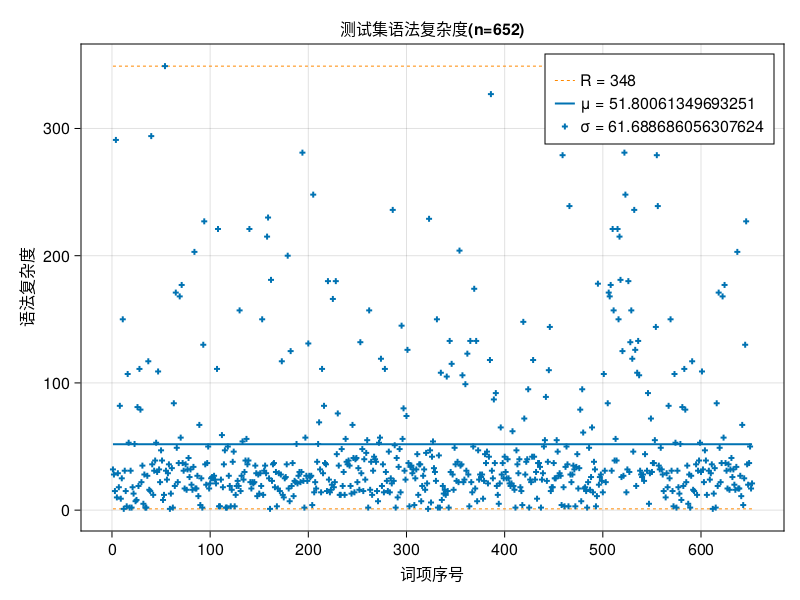

In [24]:
# ÊµãËØïÈõÜÊÉÖÂÜµ
fig = Figure()
ax = Axis(fig[1, 1])

let 
    # ËÆ°ÁÆóÁªìÊûú
    xs = 1:length(test_set.complexity)
    ys = test_set.complexity
    
    Œº_y = sum(ys) / length(ys)
    œÉ_y = ‚àö(sum((ys .- Œº_y) .^ 2) / length(ys)) # „Äê20230816 21:22:20„Äë‰ΩøÁî®Ê†πÂè∑‚àöËÆ°ÁÆóÊñπÊ†π
    max_y = max(ys...)
    min_y = min(ys...)
    one_ys = ones(length(ys))
    
    # ÁªòÂà∂ÊúÄÂ§ß„ÄÅÊúÄÂ∞èÂÄº
    l = lines!(
        ax, xs, max_y * one_ys; 
        label = "R = $(max_y-min_y)",
        linewidth = 1,
        linestyle = :dash, # ËôöÁ∫ø
        color = "0xff8800",
    )
    lines!(
        ax, xs, min_y * one_ys; 
        linewidth = 1,
        linestyle = :dash, # ËôöÁ∫ø
        color = l.color, # Â§çÁî®È¢úËâ≤
    )
    # ÁªòÂà∂ÂùáÂÄº‰∏ÄÊù°Á∫ø
    lines!(
        ax, xs, Œº_y * one_ys; 
        label = "Œº = $Œº_y",
        linewidth = 2,
        linestyle = nothing,
    )
    # ÁªòÂà∂Êï£ÁÇπÂõæ
    sl = scatterlines!(
        ax, xs, ys;
        label = "œÉ = $œÉ_y",
        linewidth = 0,
        markersize = 8,
        marker = :+,
    )
end

# ÂêéÊúüË°®Ê†º‰øÆÈ•∞
axislegend(""; position=:rt)
ax.title = "ÊµãËØïÈõÜËØ≠Ê≥ïÂ§çÊùÇÂ∫¶(n=$(size(test_set, 1)))"
ax.xlabel = "ËØçÈ°πÂ∫èÂè∑"
ax.ylabel = "ËØ≠Ê≥ïÂ§çÊùÇÂ∫¶"

current_figure()

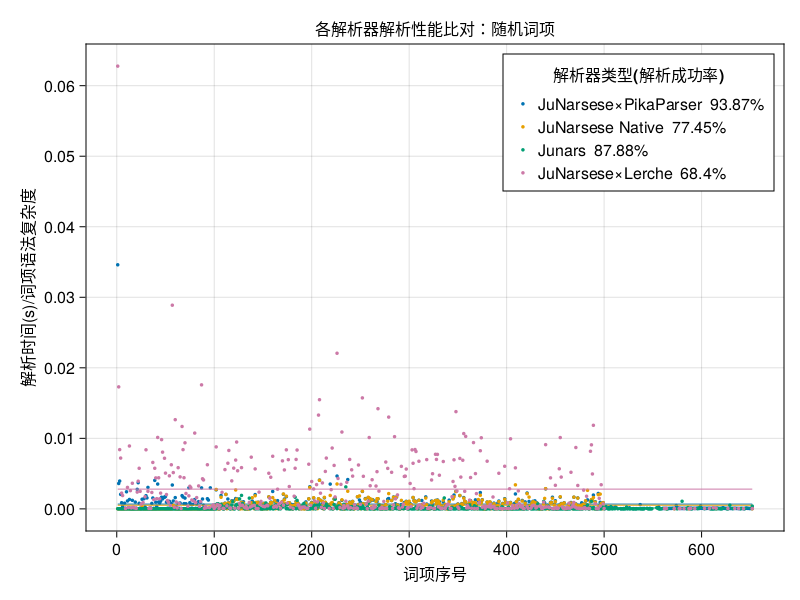

In [22]:
# ‰ΩøÁî®CairoMakieÊâìÂç∞ÂÖ∂‰∏≠ÁöÑ„ÄåËß£ÊûêÊó∂Èó¥Á∫ø„Äç
fig = Figure()
ax = Axis(fig[1, 1])
for (parser, result) in results
    N = length(result.time)
    # ËÆ°ÁÆóÁªìÊûú
    data = DataFrame(
        x = 1:N,
        y = result.time ./ result.complexity
    )
    # ËøáÊª§
    filter!(
        :y => y -> !ismissing(y) && !isnothing(y) && !isnan(y) && isfinite(y),
        data,
    )
    success_count = count((!ismissing).(result.time))
    complete_pct = string(round(success_count/N*100, digits=2), "%")
    # Êï£ÁÇπ
    sl = scatter!(
        ax, data.x, data.y;
        label = "$(parser_names[parser])\t$complete_pct",
        # color = :black,
        markersize = 5,
    )
    # ÁªòÂà∂ÂùáÂÄº‰∏ÄÊù°Á∫ø
    mean_y = sum(data.y) / length(data.y)
    mean_ys = mean_y * ones(length(data.y))
    lines!(
        ax, data.x, mean_ys; 
        # color = :black, 
        linewidth = 1
    )
end

# ÂêéÊúüË°®Ê†º‰øÆÈ•∞
axislegend("Ëß£ÊûêÂô®Á±ªÂûã(Ëß£ÊûêÊàêÂäüÁéá)"; position=:rt)
ax.title = "ÂêÑËß£ÊûêÂô®Ëß£ÊûêÊÄßËÉΩÊØîÂØπÔºöÈöèÊú∫ËØçÈ°π"
ax.xlabel = "ËØçÈ°πÂ∫èÂè∑"
ax.ylabel = "Ëß£ÊûêÊó∂Èó¥(s)/ËØçÈ°πËØ≠Ê≥ïÂ§çÊùÇÂ∫¶"

current_figure()

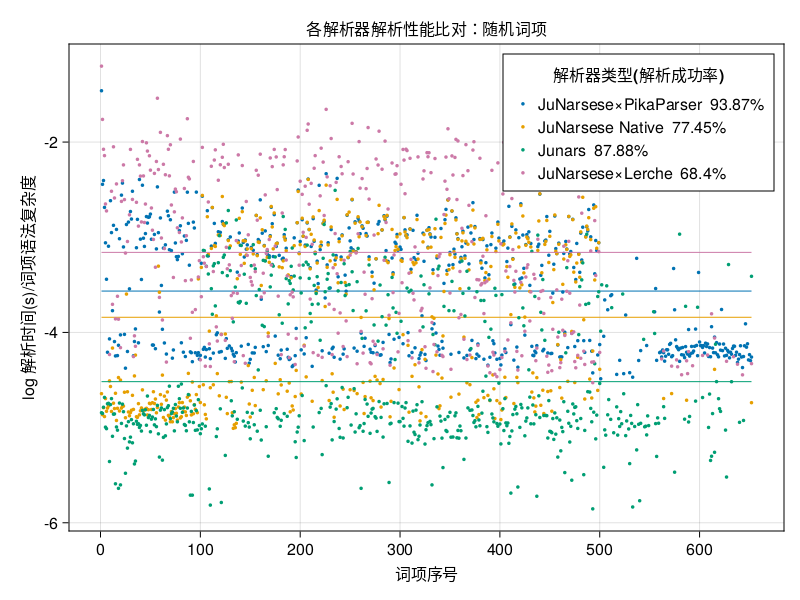

In [23]:
# ‰ΩøÁî®CairoMakieÊâìÂç∞ÂÖ∂‰∏≠ÁöÑ„ÄåËß£ÊûêÊó∂Èó¥Á∫ø„Äç
fig = Figure()
ax = Axis(fig[1, 1])
for (parser, result) in results
    # ËÆ°ÁÆóÁªìÊûú
    data = DataFrame(
        x = 1:length(result.time),
        y = log10.(result.time ./ result.complexity)
    )
    # ËøáÊª§
    filter!(
        :y => y -> !ismissing(y) && !isnothing(y) && !isnan(y) && isfinite(y),
        data,
    )
    xs, ys = data.x, data.y
    success_count = count((!ismissing).(result.time))
    complete_pct = string(round(success_count/N*100, digits=2), "%")
    # Êï£ÁÇπ
    sl = scatter!(
        ax, data.x, data.y;
        label = "$(parser_names[parser])\t$complete_pct",
        # color = :black,
        markersize = 5,
    )
    # ÁªòÂà∂ÂùáÂÄº‰∏ÄÊù°Á∫ø
    mean_ys = sum(ys) / length(ys)
    mean_ys = mean_ys * ones(length(ys))
    lines!(
        ax, xs, mean_ys; 
        # color = :black, 
        linewidth = 1
    )
end

# ÂêéÊúüË°®Ê†º‰øÆÈ•∞
axislegend("Ëß£ÊûêÂô®Á±ªÂûã(Ëß£ÊûêÊàêÂäüÁéá)"; position=:rt)
ax.title = "ÂêÑËß£ÊûêÂô®Ëß£ÊûêÊÄßËÉΩÊØîÂØπÔºöÈöèÊú∫ËØçÈ°π"
ax.xlabel = "ËØçÈ°πÂ∫èÂè∑"
ax.ylabel = "log Ëß£ÊûêÊó∂Èó¥(s)/ËØçÈ°πËØ≠Ê≥ïÂ§çÊùÇÂ∫¶"

current_figure()